In [1]:
# imported necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introduction

A sorting algorithm is any algorithm that arranges the elements of a list in a certain order. For the purposes of this project the elements will be sorted in numerical order, from lowest value to highest value. 

Algorithms are analysed in regard to their complexity (runtime and space requirements) and big O notation is used to classify the complexity of algorithms, in regard to their respective growth rates. 

This project will deal with five sorting algorithms; bubble sort, heap sort, counting sort, insertion sort, and selections sort. Bubble, heap, and selection, insertion sorts are in-place sorting algorithms, which move elements to their sorted position one at a time, while the counting sort moves elements to a temporary position closer and closer to their final position with each iteration. In-place sorting algorithms do not require any additional space when sorting an array. Additionally, these algorithms, except for the insertion sort, are stable by nature, meaning that two elements that have the same key value retain their position in the sorted array, relative to each other. The insertion algorithm is stable by its design.

The first section of the project will present the code used for each algorithm and explain how each of them sort an array. Two examples will be given for each algorithm, one example corresponding to the array use in the accompanying diagram and a also a randomly generated array. numpy.random.randint will be used to generate the random arrays, both for the examples and for the arrays used in benchmarking the algorthims.

# Sorting Algorithms 

## Bubble Sort

In [2]:
# code from https://www.geeksforgeeks.org/bubble-sort/
def bubbleSort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                temp = arr[j]
                arr[j] = arr[j+1]
                arr[j+1] = temp
    return arr

The bubble sort algorithm works by comparing adjacent elements and repeatedly swapping their positions based on the comparator assigned to the algorithm. For example, if the goal was to sort an array from lowest value to highest value the algorithm compares the first pair of elements in the array and shifts the lower value to the left. It continues through the array until the array is fully sorted.

The time complexity for this algorithms is O(n^2), which means that the running time increases quadratically as the input size increases.

The following diagram illustrates the first 10 iterations of the bubble sort algorithm. Where the the elements is less than its right neighbour both elements are highlighted in yellow. Where an element is greater than its right neighbor it is highlighted in blue and the right neigbour in green indicating that the elements will be swapped. In the example below the number 10 "bubbles" to the right most position.

<img src = "./images/bubbleSort1.png" width ="450x">

The second diagram shows the last 13 iterations of the algorithm in order to demonstrate the sorted array.

<img src = "./images/bubbleSort2.png" width ="450x">



In [3]:
# bubble sort array from above diagram
bubbleSort([3, 9, 6, 1, 10, 8, 4, 5, 2, 7])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
# bubble sort random array
bubbleSort(np.random.randint(100, size=100))

array([ 0,  0,  1,  1,  3,  4,  5,  5,  6,  7,  9, 10, 10, 10, 11, 12, 14,
       15, 16, 17, 19, 21, 22, 23, 24, 31, 31, 31, 32, 32, 33, 34, 35, 36,
       37, 37, 38, 38, 41, 42, 43, 43, 43, 44, 46, 47, 48, 48, 48, 49, 49,
       50, 50, 50, 52, 53, 55, 55, 57, 57, 57, 60, 62, 65, 65, 66, 67, 68,
       68, 72, 72, 73, 75, 77, 77, 77, 78, 78, 79, 79, 80, 80, 82, 83, 83,
       84, 86, 88, 88, 89, 89, 91, 93, 93, 95, 95, 97, 97, 97, 99])

## Heap Sort

In [5]:
#  code from https://www.geeksforgeeks.org/heap-sort/
def heapify(arr, n, i): 
    largest = i 
    left = 2 * i + 1     
    right = 2 * i + 2     
  
    
    if left < n and arr[i] < arr[left]: 
        largest = left 
  
    
    if right < n and arr[largest] < arr[right]: 
        largest = right 
  
    
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i]   
  
         
        heapify(arr, n, largest) 
 

In [6]:
# code from https://www.geeksforgeeks.org/heap-sort/
def heapSort(arr): 
    n = len(arr) 
   
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
        
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    
    return arr

There are two steps to a heap sort. Firstly, a heap is created from the input data. A heap is a tree-based data structure, as demonstrated by the initial heap in the diagram below. A max heap is a structure whereby the element with the greatest key, or value, is the root of the tree. Once a max heap has been created the algorithm places the root of the heap into the rightmost position of the sorted array. This process continues with the remaining elements until all elements have been placed into the sorted array.

The time complexity for the heap sort is O(n log(n)). 

<img src = "./images/heapSort.png" width ="450x">

In [7]:
# heap sort array from above diagram
heapSort([3, 9, 6, 1, 10, 8, 4, 5, 2, 7])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
# heap sort random array
heapSort(np.random.randint(100, size=100))

array([ 0,  3,  3,  4,  5,  5,  7,  8,  8,  8,  9,  9,  9, 10, 11, 11, 14,
       15, 16, 17, 17, 19, 20, 21, 22, 23, 24, 27, 28, 30, 31, 32, 33, 33,
       34, 36, 41, 41, 43, 43, 44, 44, 46, 48, 49, 51, 52, 52, 53, 53, 54,
       54, 54, 54, 54, 58, 59, 61, 61, 62, 62, 63, 63, 63, 65, 68, 68, 70,
       71, 71, 72, 73, 73, 75, 75, 78, 78, 80, 81, 81, 82, 83, 83, 83, 84,
       85, 87, 88, 89, 90, 90, 91, 93, 94, 95, 96, 96, 98, 98, 99])

## Counting Sort

In [9]:
# https://www.geeksforgeeks.org/counting-sort/
# adapted code from example to be applied to intergers instead of string characters
def countSort(arr):
    m = len(arr) + 1
    count = [0 for i in range(m)]
    
    for a in arr:
    # count occurences
        count[a] += 1             
    i = 0
    for a in range(m):            
        for c in range(count[a]):  
            arr[i] = a
            i += 1
    return arr

A counting sort works by counting the number of elements in an array that have a distinct key value, and using arithmetic on those counts to assign the position of these elements in the sorted array. In the below example all the instances of the number 1 are counted and, as there are no instances of the number 0, they are assigned to the first 3 positions in the sorted array. 

The time complexity of the counting algorithm is O(n+k) where n is the number of elements in the array and k is the range of elements. While k is less than or equal to n the algorithm performs efficiently but when k exceeds n the performance is impacted.

<img src = "./images/countingSort.png" width ="450x">

In [10]:
# count sort array from above diagram
countSort([9, 3, 9, 6, 1, 1, 8, 6, 5, 1])

[1, 1, 1, 3, 5, 6, 6, 8, 9, 9]

In [11]:
# count sort random array
countSort(np.random.randint(100, size=100))

array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  5,  6,  6,  7,  7,  8,  8, 10,
       10, 11, 14, 15, 16, 16, 17, 17, 17, 19, 19, 21, 23, 23, 24, 25, 25,
       26, 26, 26, 29, 29, 30, 31, 33, 34, 36, 37, 38, 39, 39, 41, 43, 46,
       50, 50, 51, 51, 52, 54, 54, 56, 56, 58, 59, 59, 59, 61, 61, 62, 62,
       68, 69, 69, 69, 69, 71, 72, 73, 74, 74, 78, 78, 79, 82, 82, 83, 84,
       84, 85, 85, 85, 86, 86, 87, 90, 91, 91, 93, 94, 96, 96, 98])

## Insertion Sort

In [12]:
# code from https://www.geeksforgeeks.org/insertion-sort/
def insertionSort(arr): 
   
    for i in range(1, len(arr)): 
  
        key = arr[i] 
   
        j = i-1
        while j >= 0 and key < arr[j] : 
                arr[j + 1] = arr[j] 
                j -= 1
        arr[j + 1] = key 
        
    return arr

An insertion sort iterates through an array by taking an element and comparing it, one by one, to all elements to the left of it in order to find its correct place in numerical order. The time complexity for this algorithms is O(n^2), just like in the case of the bubble sort.

<img src = "./images/insertionSort.png" width ="450x">

In [13]:
# insertion sort array from above diagram
insertionSort([3, 9, 6, 1, 10, 8, 4, 5, 2, 7])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [14]:
# insertion sort random array
insertionSort(np.random.randint(100, size=100))

array([ 0,  3,  4,  4,  6,  7,  9,  9,  9, 10, 12, 14, 14, 14, 16, 17, 18,
       19, 19, 19, 21, 24, 25, 26, 27, 28, 29, 29, 29, 29, 32, 33, 39, 40,
       40, 41, 42, 42, 43, 44, 46, 46, 47, 47, 49, 49, 50, 50, 51, 51, 52,
       52, 55, 55, 56, 57, 60, 61, 62, 64, 65, 65, 66, 71, 71, 71, 73, 76,
       77, 77, 78, 78, 82, 82, 82, 83, 83, 84, 86, 87, 87, 87, 88, 89, 89,
       91, 92, 93, 94, 94, 94, 96, 96, 96, 97, 97, 98, 98, 99, 99])

## Selection Sort

In [15]:
# code adapted from https://www.geeksforgeeks.org/selection-sort/
def selectSort(arr):
    n = len(arr)
    
    for i in range(n):
        
        min_index = i
        
        for j in range(i+1, n):
            
            if arr[j] < arr[min_index]:
                min_index = j
        
        arr[i], arr[min_index] = arr[min_index], arr[i]
        
    return arr

A selection sort iterates through the elements in an array to find the lowest value element. This element is then moved to the first postion in the sorted array. The algorithm then performs the same check through the remaining elements until all elements are placed into the sorted array. In the below example the number with the lowest value, hightlighted green is swapped with the first number in the unsorted array, hightlighted in belowed. The previously sorted values are highlighted in yellow through the iterations.

The time complexity for this algorithms is O(n^2), just like in the case of the bubble sort and insertion sort.

<img src = "./images/selectionSort.png" width ="450x">

In [16]:
# select sort array from above diagram
selectSort([3, 9, 6, 1, 10, 8, 4, 5, 2, 7])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [17]:
# select sort random array
selectSort(np.random.randint(100, size=100))

array([ 0,  0,  1,  1,  2,  4,  4,  5,  5,  7,  9,  9,  9, 12, 12, 14, 15,
       15, 15, 15, 16, 17, 19, 19, 20, 21, 21, 22, 22, 24, 24, 26, 26, 27,
       27, 27, 28, 29, 29, 31, 31, 33, 34, 40, 41, 41, 44, 44, 46, 49, 50,
       51, 51, 51, 52, 53, 54, 55, 56, 56, 56, 56, 57, 59, 59, 59, 60, 61,
       63, 64, 65, 66, 68, 69, 70, 71, 74, 74, 77, 78, 78, 79, 79, 79, 81,
       81, 82, 82, 85, 87, 87, 88, 88, 90, 91, 94, 94, 95, 96, 96])

# Benchmarking and Implementation

## Pandas DataFrame

A Pandas DataFrame was chosen to contain the benchmark results. This allows for a straightforward way of visualising and comparing the results.

## Benchmark Code

Below is an example of the code that will be used to bench mark the sorting algorithms. This code will be run 10 times for each test case. The average result of each test case will be appended to an array corresponding to the algorithm used. A python script containing the benchmarking code is saved in the same folder as this notebook.

In [18]:
# benchmarking code adapted from course materials 
# https://learnonline.gmit.ie/pluginfile.php/191481/mod_resource/content/0/11%20Benchmarking%20in%20Python.pdf
import time

num_runs = 10 
example = []

# create an array to contain results of test
results = []

for r in range(num_runs):
    # generate a random array to be sorted
    testOne = np.random.randint(100, size=100)
    
    # record start time
    start_time = time.time()
    
    # call sorting algorithm
    bubbleSort(testOne)
    
    # record end time
    end_time = time.time()
    
    # get total running time
    time_elapsed = end_time - start_time
    
    # append running time to array
    results.append(time_elapsed)

# calculate average of 10 runs    
first_test = np.average(results)

# append average to new array which continues benchmark results for all test cases
example.append(first_test)

example

[0.0032284021377563476]

In [19]:
# call python script containing benchmarking code 
%run -i "benchmark.py"
df

,Bubble Sort,Insertion Sort,Counting Sort,Heap Sort,Selection Sort
Input Size,,,,,
100,0.00304,0.00122,0.00007,0.00082,0.00179
250,0.01948,0.00748,0.00016,0.00252,0.01087
500,0.07762,0.03083,0.00035,0.00584,0.04451
750,0.21477,0.06990,0.00052,0.00967,0.10075
1000,0.31460,0.12683,0.00067,0.01348,0.18058
1250,0.48860,0.19907,0.00085,0.01753,0.28092
2500,2.00972,0.79861,0.00169,0.03908,1.11948
3750,4.50544,1.80287,0.00254,0.06209,2.53213
5000,7.98221,3.21516,0.00339,0.08549,4.44650


The above table contains the average result of ten runs in each test case for each algorithm.

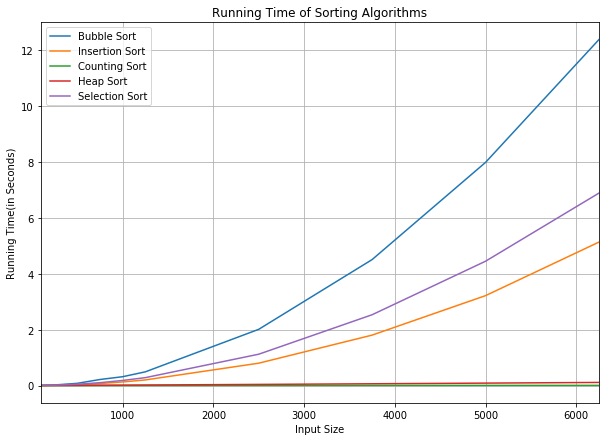

In [20]:
df.plot(figsize=(10,7))
plt.ylabel('Running Time(in Seconds)')
plt.title('Running Time of Sorting Algorithms')
plt.grid()
plt.show()

At a glance, the growth rate of the running time for each algorithm appears to be as one would expect. Of the tested algorithms, the Bubble Sort is the least efficient. This makes sense as the algorithm compares two elements at a time meaning in will only sort one element in n-1 iterations, where n is the number elements in the unsorted array.  

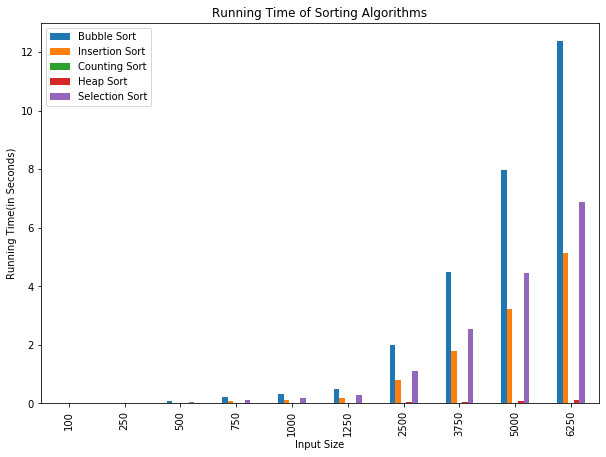

In [21]:
df.plot(kind = 'bar', figsize=(10,7))
plt.ylabel('Running Time(in Seconds)')
plt.title('Running Time of Sorting Algorithms')
plt.show()

The Counting Sort Algorithm has proven to be the most of efficient of the algorithms tested. So much so, in fact, that it is not visible on the previous bar chart. The Counting Sort algorithm  is not comparison based, like the others, instead counting the occurences of key values in random arrays.

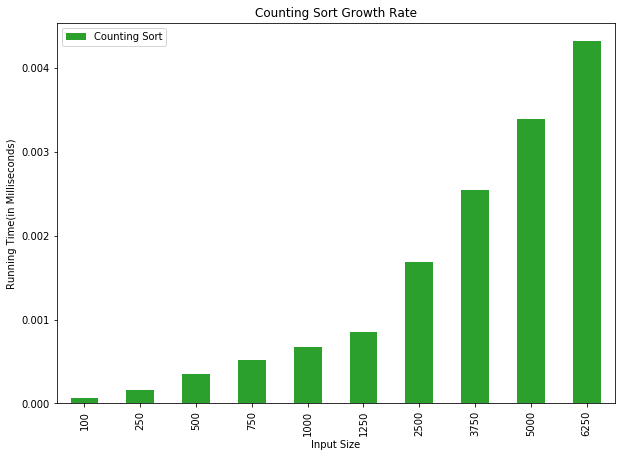

In [22]:
df[['Counting Sort']].plot(kind = 'bar', figsize=(10,7), color = 'tab:green')
plt.ylabel('Running Time(in Milliseconds)')
plt.title('Counting Sort Growth Rate')
plt.show()

Likewise, the Heap Sort algorithm is only just visible on the same bar chart when larger test cases are plotted. While the Heap Sort algorithm is comparison based it is empirically more efficient than the other comparison based sorting algorithms that were tested. This is in keeping with what one would expect based on the expected growth rate of the algorithms discussed previously in this project. The time compexity for the Heap Sort algorithm is O(n log(n)), while the other comparison based algorithms have a time complexity of O(n^2), meaning the running time increases quadratically.

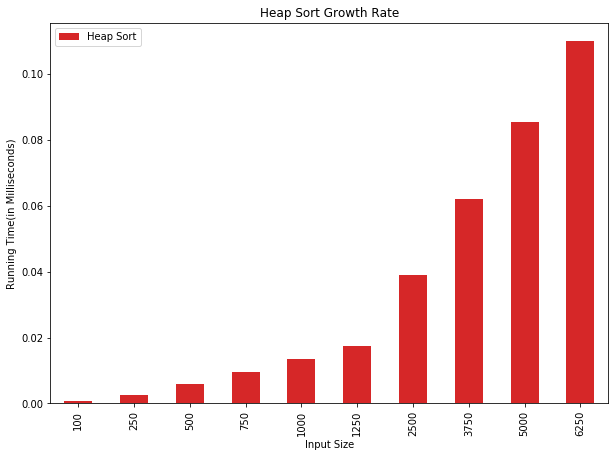

In [23]:
df[['Heap Sort']].plot(kind = 'bar', figsize=(10,7), color = 'tab:red')
plt.ylabel('Running Time(in Milliseconds)')
plt.xlabel('Input Size')
plt.title('Heap Sort Growth Rate')
plt.show()

In [24]:
df[['Counting Sort', 'Heap Sort']]

,Counting Sort,Heap Sort
Input Size,,
100,0.00007,0.00082
250,0.00016,0.00252
500,0.00035,0.00584
750,0.00052,0.00967
1000,0.00067,0.01348
1250,0.00085,0.01753
2500,0.00169,0.03908
3750,0.00254,0.06209
5000,0.00339,0.08549


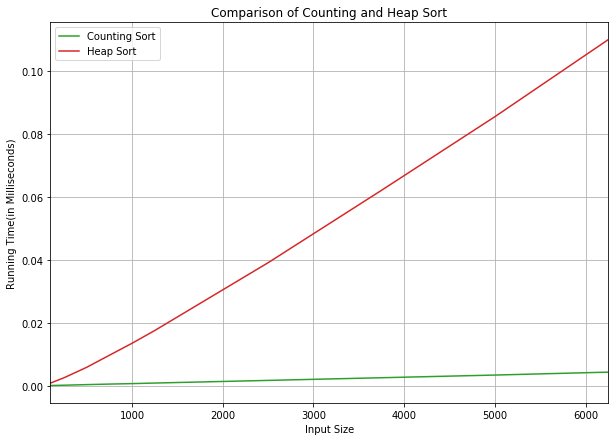

In [25]:
df[['Counting Sort', 'Heap Sort']].plot(figsize = (10,7), color = ['tab:green', 'tab:red'])
plt.grid()
plt.title('Comparison of Counting and Heap Sort')
plt.ylabel('Running Time(in Milliseconds)')
plt.show()

The above plot illustrates the difference between the Heap Sort and Counting sort more clearly, as in the first plot the difference is barely perceptible.   

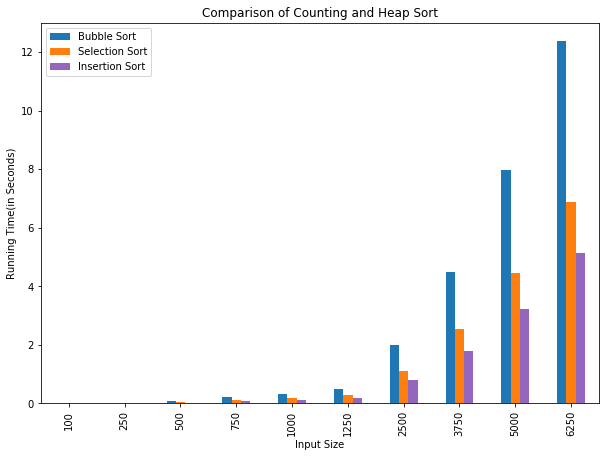

In [26]:
df[['Bubble Sort', 'Selection Sort', 'Insertion Sort']].plot(kind = 'bar', figsize=(10,7), color = ['tab:blue', 'tab:orange', 'tab:purple'])
plt.ylabel('Running Time(in Seconds)')
plt.title('Comparison of Counting and Heap Sort')
plt.show()

In [27]:
df[['Bubble Sort', 'Insertion Sort', 'Selection Sort']]

,Bubble Sort,Insertion Sort,Selection Sort
Input Size,,,
100,0.00304,0.00122,0.00179
250,0.01948,0.00748,0.01087
500,0.07762,0.03083,0.04451
750,0.21477,0.06990,0.10075
1000,0.31460,0.12683,0.18058
1250,0.48860,0.19907,0.28092
2500,2.00972,0.79861,1.11948
3750,4.50544,1.80287,2.53213
5000,7.98221,3.21516,4.44650


Again, as expected, the  Bubble Sort, Selection Sort, and Insertion algorithms all have similar growth rates. The Selection Sort algorithm requires more iterations than the Insertion sort as it swaps the position of two elements while the the Insertion moves one element to the correct position in respect to all elements to its left.

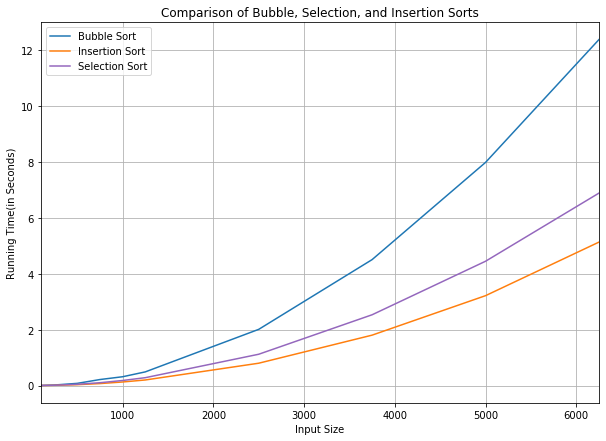

In [28]:
df[['Bubble Sort', 'Insertion Sort', 'Selection Sort']].plot(figsize=(10,7), color = ['tab:blue', 'tab:orange', 'tab:purple'])
plt.grid()
plt.title('Comparison of Bubble, Selection, and Insertion Sorts')
plt.ylabel('Running Time(in Seconds)')
plt.show()

# References
* https://www.geeksforgeeks.org/bubble-sort/
* https://www.geeksforgeeks.org/counting-sort/
* https://www.geeksforgeeks.org/heap-sort/
* https://www.geeksforgeeks.org/insertion-sort/
* https://www.geeksforgeeks.org/selection-sort/
* https://www.geeksforgeeks.org/sorting-terminology/
* https://www.geeksforgeeks.org/stability-in-sorting-algorithms/
* https://learnonline.gmit.ie/pluginfile.php/191466/mod_resource/content/0/07%20Sorting%20Algorithms%20Part%201.pdf
* https://learnonline.gmit.ie/pluginfile.php/191471/mod_resource/content/0/08%20Sorting%20Algorithms%20Part%202.pdf
* https://learnonline.gmit.ie/pluginfile.php/191472/mod_resource/content/0/09%20Sorting%20Algorithms%20Part%203.pdf
* https://learnonline.gmit.ie/pluginfile.php/191481/mod_resource/content/0/11%20Benchmarking%20in%20Python.pdf
